In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics, svm
from sklearn import datasets
from scipy.stats import mode
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.neighbors import NearestCentroid
from sklearn.model_selection import train_test_split
from time import time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

np.random.seed(seed=42)

Each item that is proposed to be completed as part of the homework has a declared "price" in points. The maximum possible amount is 10 points, and including bonus points - 12 points. It is not necessary to complete all the points, you can only do a part. Most of the points expect you to write working Python code; sometimes it will be necessary to write comments in free form - for example, to compare several approaches to solving the same problem. Where empty cells are left for your answers, you can add more cells at your discretion.

* * *

This lab focuses on clustering. We will work with handwritten images of numbers, learn how to cluster them using two different methods (hierarchical clustering and the $ K $ -means algorithm), evaluate the quality of the partition and choose the optimal number of clusters, as well as visualize intermediate results.

# 1. Retrieving data

The data we will be working with is available in the scikit-learn library (the module is called `sklearn`) in the` datasets` submodule via a function called `load_digits`. There are 1797 observations in total, each of them represents a black and white image of 8 $ \ times $ 8 pixels. These pictures are recognized handwritten digits from 0 to 9. Samples of writing each digit are given approximately equally, about 180.

For the convenience of using the data, each picture is "expanded" into a string, so that the NumPy array, which stores the data, has a dimension of 2 and a value of 1797 $ \ times $ 64 (and not, for example, a dimension of 3 and a value of 1797 $ \ times $ 8 $ \ times $ 8). The color intensity in each pixel is encoded with an integer from 0 to 16.

In addition to observations (pictures), the corresponding values ​​of the target variable are known: what number each picture actually represents. We could immediately formulate the task of teaching with a teacher and predict the numbers from the pictures, but for the purposes of this laboratory work we will act differently: we will pretend that we do not know the true class labels (i.e. numbers) and even the number of classes, and we will try to group the data so that the quality of clustering is the best, and then we will see how accurately the obtained clusters coincide with the groups of images of the same numbers.

**(0.5 балла)** Load data. Ensure that variable `X` contains an array of observations containing 1797 $ \ times $ 64 numbers, and variable` y` contains an array of true class labels containing 1797 numbers.

*Guidelines*
- How to load data is explained in the help for the `load_digits` function.
- The size of the array is stored in the `shape` attribute.

In [2]:
X, y = datasets.load_digits(return_X_y=True)
print(f' X with shape: {X.shape} \n y with shape: {y.shape} ')

(n_samples, n_features), n_digits = X.shape, np.unique(y).size
print(f' # digits: {n_digits} \n # samples: {n_samples} \n # features {n_features}')

 X with shape: (1797, 64) 
 y with shape: (1797,) 
 # digits: 10 
 # samples: 1797 
 # features 64


**(1 балл)** Render the first ten pictures by placing them on a 3 $ \ times $ 4 grid (there will be empty spaces in the last row). Make sure that the background of the pictures is white and the pictures of the numbers are dark.

*Guidelines:*
- Don't forget to import NumPy and Matplotlib.
- Pictures 8 $ \ times $ 8 can either be obtained ready-made from the object loaded by the `load_digits` function, or made independently from the strings of the` X` array. In the second case, use the `reshape` method.
- To prevent the image from being colored, you can call the `plt.gray` function before starting to paint.
- The `plt.subplot` function can arrange pictures on the grid. Check out the help for it.
- By default, the number 0 encodes black, and the number 16 encodes white. Think about how to invert the colors in a single operation on a NumPy array.
- The `plt.imshow` function can display a picture on the screen. Check out the help for it.
- If you want, you can disable anti-aliasing - the `interpolation` parameter of the` plt.imshow` function.
- If you want, you can turn off tick marks on the coordinate axes. The functions `plt.xticks` and` plt.yticks` are responsible for this.

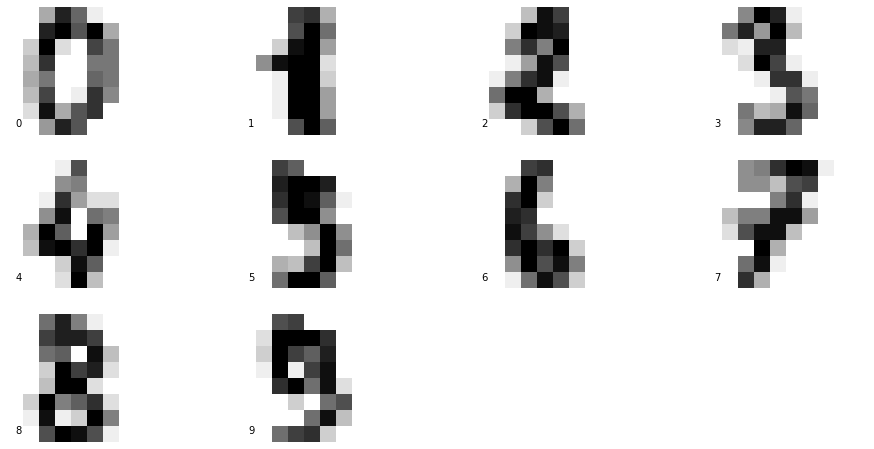

In [3]:
_, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 8))
i=0
for row in axes:
    for col in row:
        col.axis('off')
        if i<10:
            col.imshow(X[i,:].reshape([8,8]), cmap=plt.cm.gray_r, interpolation='none')
            col.text(0, 7, str(y[i]))
        i+=1

# 2. Clustering and quality assessment

We will use two popular algorithms: hierarchical clustering and the $ K $ -means clustering method. These and other clustering algorithms are available in the scikit-learn library under the `cluster` submodule. Hierarchical clustering is called `AgglomerativeClustering`, and the $ K $ means method is called` KMeans`.

The interface for most algorithms in scikit-learn is simple and consistent:
- To initialize a model, you need to create an instance of the corresponding class with all the necessary parameters. For example, for clusters, the only required parameter is called `n_clusters`, this is the number of clusters we want to receive in the output.
- The initialized model can be trained by calling the `fit` method.
- Using the trained model, you can predict by calling the `predict` method.

As you can see, this interface is good only for supervised learning tasks, in which the phases of model training and prediction with its help are clearly separated. Clusterizations, on the other hand, have a `fit_predict` method that splits the input sample into clusters and immediately returns the split results.

**(0.5 балла)** Using each of two methods, hierarchical clustering and $ K $ means, get a partition of the array `X` into 10 clusters.

*Guidelines:*
- Both times you should get an array of 1797 numbers - the numbers of the clusters.
- `KMeans` makes several (default 10) runs with random centers and from the resulting partitions deduces the best in terms of the average intra-cluster distance. To improve the quality of predictions, you can increase the number of starts, for example, to 100. This is the `n_init` parameter in the constructor.

In [4]:
#Kmeans

#Transform the data
reduced_data = PCA(n_components=2).fit_transform(X)

#Initialize the class object
kmeans = KMeans(n_clusters= 10, n_init=100)
kmeans_labels = kmeans.fit_predict(reduced_data)

print(f'Kmeans clusterization result shape: {kmeans_labels.shape}')

Kmeans clusterization result shape: (1797,)


u_labels: [0 1 2 3 4 5 6 7 8 9]
reduced_data: (1797, 2)


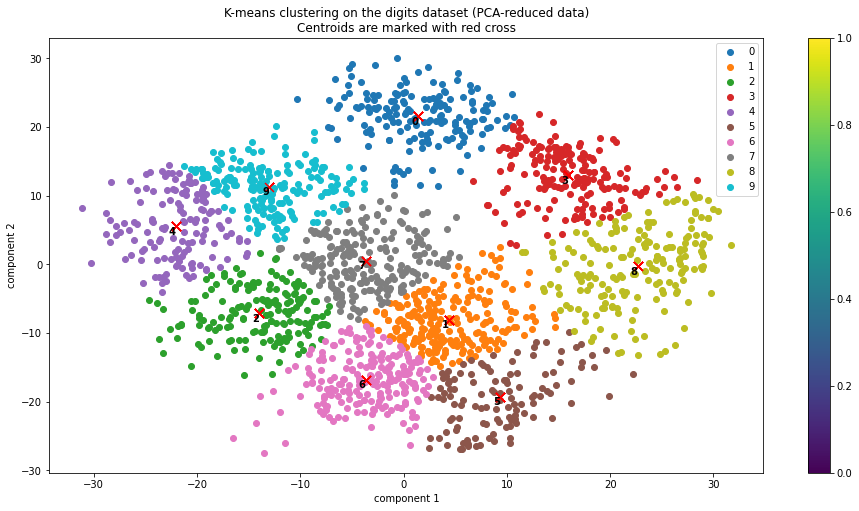

In [5]:
#Kmeans

u_labels = np.unique(kmeans_labels)
km_centroids = kmeans.cluster_centers_
centroid_labels = []
plt.figure(figsize=(16,8))
print(f'u_labels: {u_labels}')
print(f'reduced_data: {reduced_data.shape}')

for i in u_labels:
    plt.scatter(reduced_data[kmeans_labels == i , 0] , reduced_data[kmeans_labels == i , 1] , label = i)
    plt.scatter(km_centroids[:, 0], km_centroids[:, 1], s = 80, marker='x', color='r')

for i in range(10):
    centroid_labels.append('{0}'.format(i))
    xy=(km_centroids[i, 0],km_centroids[i, 1])
    plt.annotate(centroid_labels[i], xy, horizontalalignment='right', verticalalignment='top', weight='bold', clip_on=True)

plt.colorbar()
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with red cross')
plt.xlabel('component 1')
plt.ylabel('component 2')  
plt.legend()
plt.show()

In [6]:
# AgglomerativeClustering

#Initialize the class object
hierarchical = AgglomerativeClustering(n_clusters=10)
hc_labels = hierarchical.fit_predict(reduced_data)

print(f'Hierarchical clusterization result shape: {hc_labels.shape}')

Hierarchical clusterization result shape: (1797,)


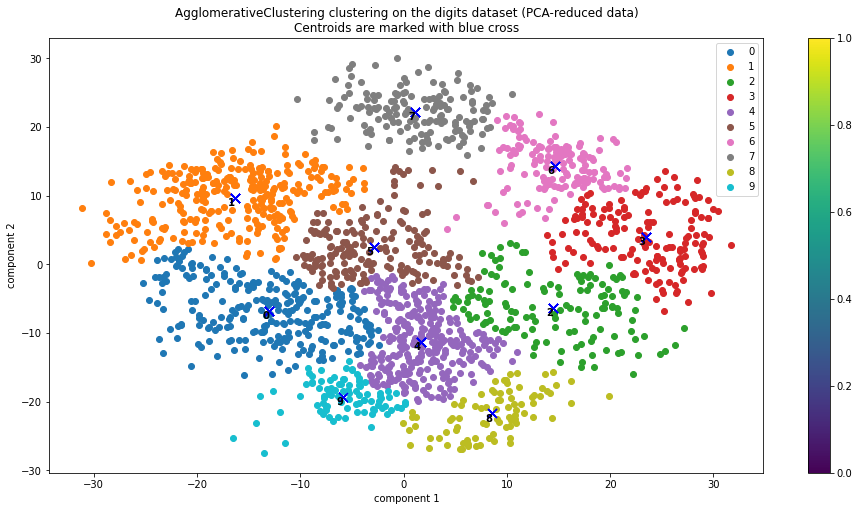

In [7]:
plt.figure(figsize=(16, 8))
clf = NearestCentroid()
clf.fit(reduced_data, hc_labels)
hc_centroids = clf.centroids_
unique_labels = np.unique(hc_labels)
hc_centroid_labels = []

for i in range(10):
    hc_centroid_labels.append('{0}'.format(i))
    xy=(hc_centroids[i, 0],hc_centroids[i, 1])
    plt.annotate(hc_centroid_labels[i], xy, horizontalalignment='right', verticalalignment='top', weight='bold', clip_on=True)
for i in unique_labels:
    plt.scatter(reduced_data[hc_labels == i , 0], reduced_data[hc_labels == i , 1] , label = i)
    plt.scatter(hc_centroids[:, 0], hc_centroids[:, 1], s = 80, marker='x', color='b')

plt.title('AgglomerativeClustering clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with blue cross')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.legend()
plt.show()

**(1 балл)** Visualize the centers of the clusters obtained in each of the two ways. Again, these should be pictures on a 3 $ \ times $ 4 grid with a white background and dark outlines. Please comment: which of the two algorithms gives cluster centers that look more like typical numerals?

*Guidelines:*
- The center of the cluster is the average over all observations included in the cluster, that is, over some set of rows from `X`.
- Use boolean mask indexing to select cases from cluster number `i`. The mask itself can be obtained from the array of predicted cluster numbers and the number `i` using the operator` == `.
- The `np.mean` function is able to average a NumPy array along any of the axes. Check out the help for it. We need line averaging.

How accurate our unsupervised clustering was in finding similar digits within the data: 
0.7935447968836951
Silhouette:  0.18251916424600556


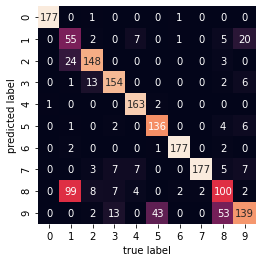

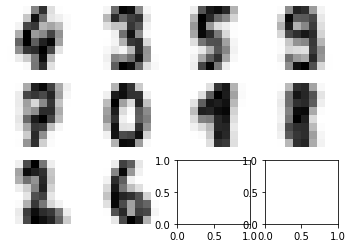

In [56]:
kmeans = KMeans(n_clusters=10, random_state=0)
km_clusters = kmeans.fit_predict(X)

msk_labels = np.zeros_like(km_clusters)
for i in range(10):
    mask = (km_clusters == i)
    msk_labels[mask] = mode(y[mask])[0]

print(f'How accurate our unsupervised clustering was in finding similar digits within the data: \n{accuracy_score(y, msk_labels)}')
print('Silhouette: ', metrics.silhouette_score(X, kmeans.labels_))

# let's check with confusion_matrix as well
mat = confusion_matrix(y, msk_labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

fig, ax = plt.subplots(3, 4)
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.axis('off')
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

How accurate our unsupervised clustering was in finding similar digits within the data: 
0.8619922092376182
Silhouette:  0.17849659940596496


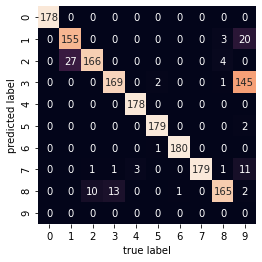

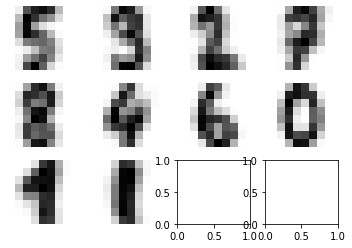

In [57]:
hierarchical = AgglomerativeClustering(n_clusters=10)
hc_clusters = hierarchical.fit_predict(X)
clf = NearestCentroid()
clf.fit(X, hc_clusters)
hc_centroids = clf.centroids_

msk_labels = np.zeros_like(hc_clusters)
for i in range(10):
    mask = (hc_clusters == i)
    msk_labels[mask] = mode(y[mask])[0]

print(f'How accurate our unsupervised clustering was in finding similar digits within the data: \n{accuracy_score(y, msk_labels)}')
print('Silhouette: ', metrics.silhouette_score(X,hc_clusters))

#let's check with confusion_matrix as well
mat = confusion_matrix(y, msk_labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

fig, ax = plt.subplots(3, 4)
centers = hc_centroids.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.axis('off')
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

Depending on the observations, and results from *accuracy_score* and *silhouette_score* using *Agglomerative Clustering* gives more accurate prediction on recognizing digits.

In a situation where the true number of clusters is unknown, the optimal number of clusters is selected. In this case, two quantities are taken into account: the intra-cluster distance (the smaller, the better) and the inter-cluster distance (the more, the better). Since these two values ​​do not reach the optimum at the same time, they usually optimize some functionality from them. One popular feature is called silhouette. This is how it is calculated.

Let $ X $ be a set of observations, $ M \ subset X $ is one of the clusters into which it is divided as a result of clustering, $ \ rho $ is a metric on $ X $. Let us choose some one observation $ x \ in M ​​$. Let's denote by $ a (x) $ the average distance from $ x $ to points $ x '$ from the same cluster:

$$
a(x) = \frac{1}{|M| - 1} \sum_{x' \in M,\, x' \ne x} \rho(x,\, x')
$$

Let's denote by $ b (x) $ the minimum of average distances from $ x $ to points $ x '' $ from some other cluster $ N $:
$$
b(x) = \min_{N \ne M} \frac{1}{|N|} \sum_{x'' \in N} \rho(x,\, x'')
$$

The silhouette is the difference between the inter-cluster and intra-cluster distances, normalized to the segment $ [- 1, \, 1] $ and averaged over all observations:
$$
\frac{1}{|X|} \sum_{x \in X} \frac{b(x) - a(x)}{\max(a(x),\, b(x))}
$$

In scikit-learn, silhouette is considered the `silhouette_score` function from the` metrics` submodule. An array of observations and the clustering result must be passed to the input.

**(1.5 балла)** For the number $ K $ from 2 to 20 inclusive, get the partition of the array `X` into $ K $ clusters by each of the two methods. Count the silhouette. Save the calculated silhouette values ​​into a variable and visualize them in the form of a graph in coordinates: $ K $ number - silhouette value. At what number of clusters is the maximum silhouette achieved?

*Guidelines:*
- Remember that the `range` function does not capture the right end of the range.
- Two lists can be created under the silhouette values: one for hierarchical clustering, the other for $ K $ averages.
- The `plt.plot` function can draw graphs. Check out the help for it.
- Several graphs can be placed on one picture, these are just several sequential calls to `plt.plot`.
- To add a legend (captions to graphs), you can use the `plt.legend` function. The location of the legend is controlled by the `loc` parameter.
- You can use the `plt.xlabel` and` plt.ylabel` functions to label the coordinate axes.

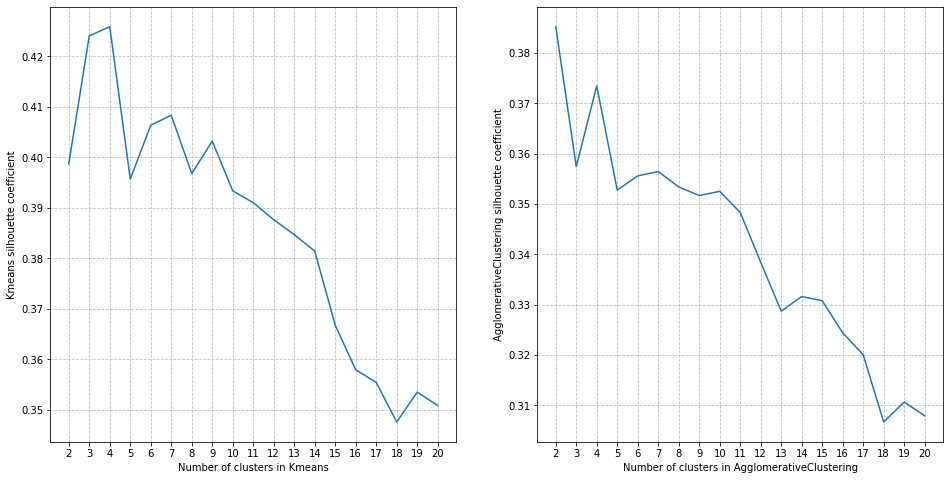

In [18]:
km_silhouette_coefficients = []
hc_silhouette_coefficients = []
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, n_init=100)
    kmeans.fit(reduced_data)
    score = metrics.silhouette_score(reduced_data, kmeans.labels_)
    km_silhouette_coefficients.append(score)
    
    hc = AgglomerativeClustering(n_clusters=k)
    hc.fit(reduced_data)
    score = metrics.silhouette_score(reduced_data, hc.labels_)
    hc_silhouette_coefficients.append(score)
    
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
ax1.plot(range(2, 21), km_silhouette_coefficients, c='b')
ax1.set_xticks(range(2, 21))
ax1.set_xlabel("Number of clusters in Kmeans")
ax1.set_ylabel("Kmeans silhouette coefficient")
ax1.grid(linestyle='--', alpha=0.8)

ax2.plot(range(2, 21), hc_silhouette_coefficients, c='g')
ax2.set_xticks(range(2, 21))
ax2.set_xlabel("Number of clusters in AgglomerativeClustering")
ax2.set_ylabel("AgglomerativeClustering silhouette coefficient")
ax2.grid(linestyle='--', alpha=0.8)

plt.show()

When the "correct" (in some sense) clustering is known, the clustering result can be compared with it using measures such as homogeneity, completeness, and their harmonic mean - $ V $ -measure. The definitions of these quantities are rather cumbersome and are based on the concept of [entropy of probability distribution](https://ru.wikipedia.org/wiki/Information_entropy); details are provided in [this article](http://aclweb.org/anthology/D/D07/D07-1043.pdf). In practice, it is enough to know that uniformity, completeness and $ V $ -measure are enclosed between zero and one - the more the better.

Since we know what digit each picture actually represents (this is an array `y`), we can use uniformity, completeness and $ V $ -measure to assess the quality of clustering. Functions for calculating these values ​​are available in scikit-learn, in the `metrics` submodule, under the names` homogeneity_score`, `completeness_score`,` v_measure_score`. Alternatively, you can use the function `homogeneity_completeness_v_measure`, which returns three numbers at once.

**(1 балл)** Repeat the previous task using a $ V $ -measure instead of a silhouette. At what number of clusters is the maximum of the $ V $ -measure attained?

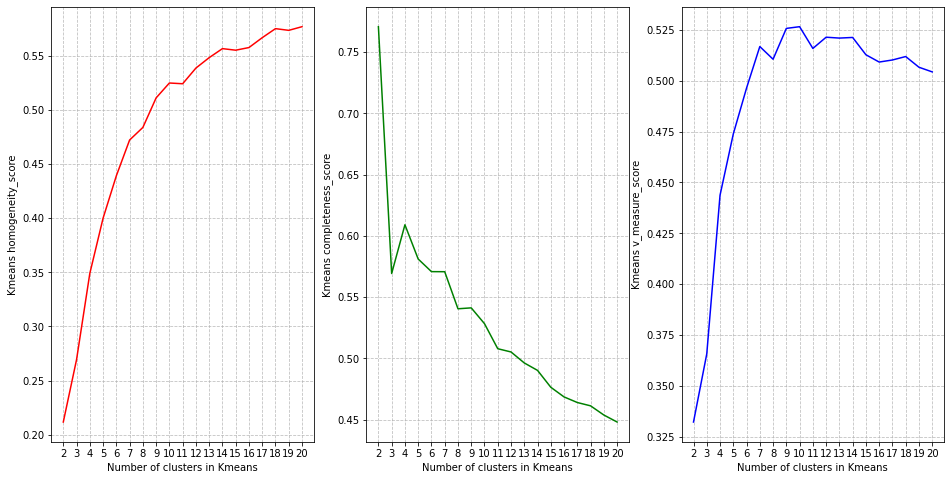

In [26]:
km_homogeneity_scores = []
km_completeness_scores = []
km_v_measure_scores = []

for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, n_init=100)
    kmeans.fit(reduced_data)
    km_homogeneity_scores.append(metrics.homogeneity_score(y, kmeans.labels_))
    km_completeness_scores.append(metrics.completeness_score(y, kmeans.labels_))
    km_v_measure_scores.append(metrics.v_measure_score(y, kmeans.labels_))
    
_, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 8))
ax1.plot(range(2, 21), km_homogeneity_scores, c='r')
ax1.set_xticks(range(2, 21))
ax1.set_xlabel("Number of clusters in Kmeans")
ax1.set_ylabel("Kmeans homogeneity_score")
ax1.grid(linestyle='--', alpha=0.8)

ax2.plot(range(2, 21), km_completeness_scores, c='g')
ax2.set_xticks(range(2, 21))
ax2.set_xlabel("Number of clusters in Kmeans")
ax2.set_ylabel("Kmeans completeness_score")
ax2.grid(linestyle='--', alpha=0.8)

ax3.plot(range(2, 21), km_v_measure_scores, c='b')
ax3.set_xticks(range(2, 21))
ax3.set_xlabel("Number of clusters in Kmeans")
ax3.set_ylabel("Kmeans v_measure_score")
ax3.grid(linestyle='--', alpha=0.8)

plt.show()

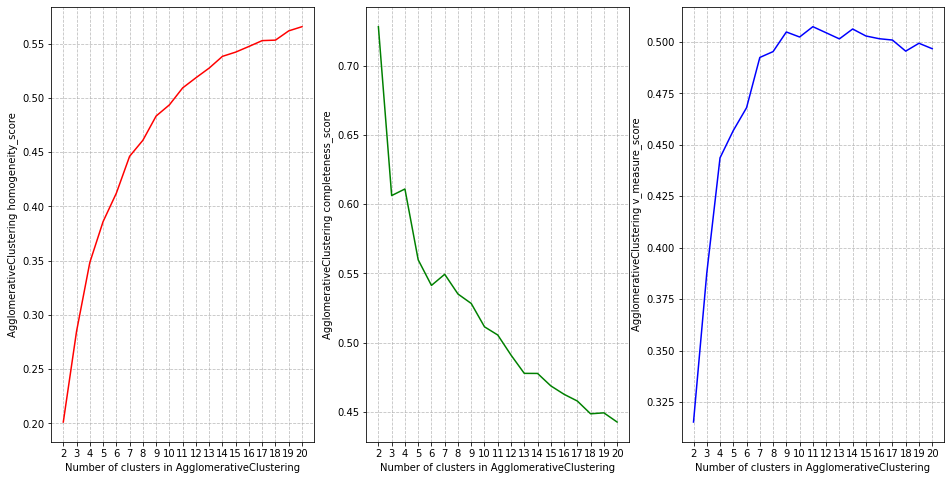

In [27]:
hc_homogeneity_scores = []
hc_completeness_scores = []
hc_v_measure_scores = []

for k in range(2, 21):
    # for hc
    hc = AgglomerativeClustering(n_clusters=k)
    hc.fit(reduced_data)
    
    hc_homogeneity_scores.append(metrics.homogeneity_score(y, hc.labels_))
    hc_completeness_scores.append(metrics.completeness_score(y, hc.labels_))
    hc_v_measure_scores.append(metrics.v_measure_score(y, hc.labels_))

_, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 8))
ax1.plot(range(2, 21), hc_homogeneity_scores, c='r')
ax1.set_xticks(range(2, 21))
ax1.set_xlabel("Number of clusters in AgglomerativeClustering")
ax1.set_ylabel("AgglomerativeClustering homogeneity_score")
ax1.grid(linestyle='--', alpha=0.8)

ax2.plot(range(2, 21), hc_completeness_scores, c='g')
ax2.set_xticks(range(2, 21))
ax2.set_xlabel("Number of clusters in AgglomerativeClustering")
ax2.set_ylabel("AgglomerativeClustering completeness_score")
ax2.grid(linestyle='--', alpha=0.8)

ax3.plot(range(2, 21), hc_v_measure_scores, c='b')
ax3.set_xticks(range(2, 21))
ax3.set_xlabel("Number of clusters in AgglomerativeClustering")
ax3.set_ylabel("AgglomerativeClustering v_measure_score")
ax3.grid(linestyle='--', alpha=0.8)

plt.show()

# 3. Reducing the dimension of the feature space

Sometimes, especially when there are many features and not all of them are equally informative, it is useful to reduce the dimension of the feature space, that is, instead of $ d $ of the original features, go to the consideration of $ d '\ ll d $ new features. The data was represented by a matrix of $ n $ observations $ \ times $ $ d $ of the original features, and will now be represented by a matrix of $ n $ observations $ \ times $ $ d '$ of new features.

There are two popular approaches to dimensionality reduction:
- select (select) new features from the existing ones;
- to extract (extract) new features, transforming old ones, for example, to make $ d '$ different linear combinations of columns of the original matrix $ n \ times d $.

One of the widely used methods of feature extraction is the singular value decomposition (SVD). This method allows constructing any number $ d '\ le d $ of new features in such a way that they will, in a certain sense, be as informative as possible. The mathematical details are not important now; you can get acquainted with them, for example, [here](https://www.coursera.org/learn/mathematics-and-python/lecture/L9bCV/razlozhieniia-matrits-v-proizviedieniie-singhuliarnoie-razlozhieniie)
(in Russian) or [here](https://www.youtube.com/watch?v=P5mlg91as1c) (in English).

Scikit-learn has several singular value decomposition implementations. We will use the `TruncatedSVD` class from the` decomposition` submodule. It is enough to pass one parameter `n_components` to the constructor of this class - the desired number of new features. The fit_transform method takes a matrix and returns a new matrix with the same number of rows as before and the number of columns equal to the number of new features.

<u> Note: </u> The singular value decomposition of the matrix $ M $ is usually written as $ M = U \ Sigma V ^ {*} $, where $ U $, $ \ Sigma $ and $ V $ are some matrices with good properties. What the TruncatedSVD algorithm returns is some (how many we want to get) the first columns of the $ U $ matrix.

**(1.5 балла)** Singularize the matrix `X`, leaving 2, 5, 10, 20 features. In each case, perform a hierarchical and $ K $ -means clustering of the transformed data (the number of clusters is assumed to be 10). Count the silhouette values ​​and $ V $ -measures. For some $ d '$, did you manage to get the silhouette and / or $ V $ -measure better than on the original data?

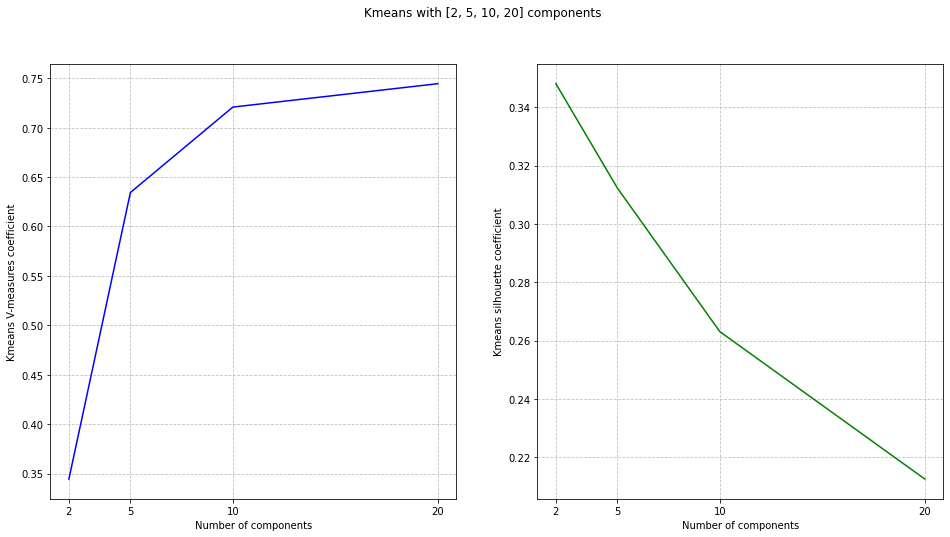

In [34]:
n_components = [2, 5, 10, 20]
v_coefficients = []
silhouette_coefficients = []
for i in n_components:
    svd = TruncatedSVD(n_components=i)
    reduced_X = svd.fit_transform(X)
    kmeans = KMeans(n_clusters=10)
    y_pred = kmeans.fit_predict(reduced_X)
    v_coefficients.append(metrics.v_measure_score(y, y_pred))
    silhouette_coefficients.append(metrics.silhouette_score(reduced_X, y_pred))

_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
_.suptitle("Kmeans with [2, 5, 10, 20] components")

ax1.plot(n_components, v_coefficients, c='b')
ax1.set_xticks(n_components)
ax1.set_xlabel("Number of components")
ax1.set_ylabel("Kmeans V-measures coefficient")
ax1.grid(linestyle='--', alpha=0.8)

ax2.plot(n_components, silhouette_coefficients, c='g')
ax2.set_xticks(n_components)
ax2.set_xlabel("Number of components")
ax2.set_ylabel("Kmeans silhouette coefficient")
ax2.grid(linestyle='--', alpha=0.8)

plt.show()

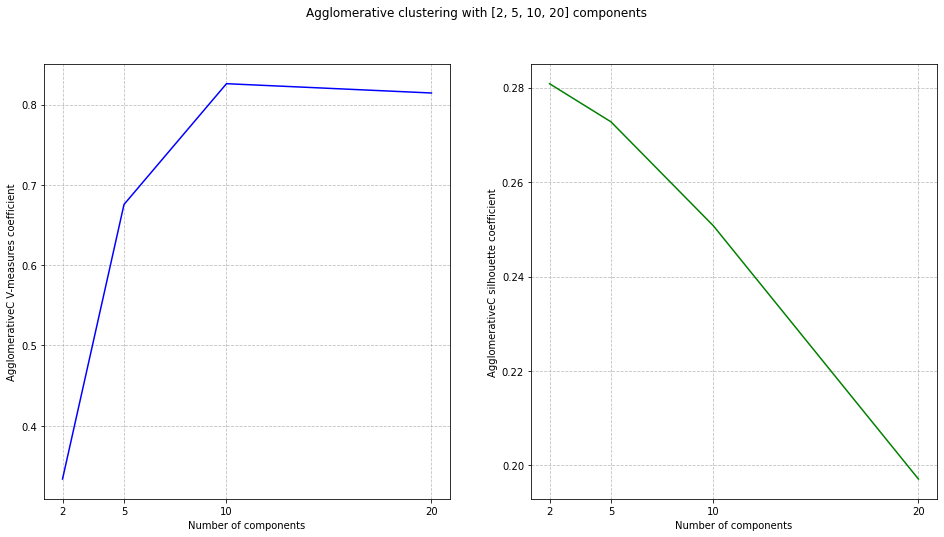

In [36]:
n_components = [2, 5, 10, 20]
v_coefficients = []
silhouette_coefficients = []
for i in n_components:
    svd = TruncatedSVD(n_components=i)
    reduced_X = svd.fit_transform(X)
    
    hc = AgglomerativeClustering(n_clusters=10)
    hc.fit(reduced_data)
    y_pred = hc.fit_predict(reduced_X)
    v_coefficients.append(metrics.v_measure_score(y, y_pred))
    silhouette_coefficients.append(metrics.silhouette_score(reduced_X, y_pred))

_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
_.suptitle("Agglomerative clustering with [2, 5, 10, 20] components")

ax1.plot(n_components, v_coefficients, c='b')
ax1.set_xticks(n_components)
ax1.set_xlabel("Number of components")
ax1.set_ylabel("AgglomerativeC V-measures coefficient")
ax1.grid(linestyle='--', alpha=0.8)

ax2.plot(n_components, silhouette_coefficients, c='g')
ax2.set_xticks(n_components)
ax2.set_xlabel("Number of components")
ax2.set_ylabel("AgglomerativeC silhouette coefficient")
ax2.grid(linestyle='--', alpha=0.8)

plt.show()

Another popular dimensionality reduction technique that works especially well with images is the t-distributed stochastic neighbor embeddings algorithm, or tSNE for short. Unlike singular value decomposition, this transformation is non-linear. Its main idea is to map points from a space of dimension $ d $ into space of dimension 2 or 3 (usually 2, that is, onto a plane) in such a way as to preserve the distances as accurately as possible. There are mathematical details, for example [here](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding), but they are not trivial.

In scikit-learn, the tSNE implementation is the class `TSNE` in the` manifold` submodule. You can pass the `n_components` parameter to the constructor, or you don't need to pass it: by default, it is 2. The` fit_transform` method works in the same way as for `TruncatedSVD`.

<u> Note: </u> In recent years, instead of tSNE in practice, it is often used [UMAP](https://github.com/lmcinnes/umap), a faster algorithm with similar properties. This lab does not suggest using UMAP as it would require installing another dependency, the `umap-learn` library. Those interested can do tasks on tSNE using UMAP; in this case, pay attention to the parameters `n_neighbors` and` min_dist`, which define the type of projection.

**(0.5 баллa)** Perform tSNE-transformation of the matrix `X`, leaving 2 features. Visualize the data transformed in this way as a scatter plot: the first characteristic along the horizontal axis, the second characteristic along the vertical axis. Highlight the groups of dots corresponding to different numbers with different colors.

*Guidelines:*
- The `plt.scatter` function can draw a scatter diagram. Check out the help for it.
- The `c` parameter of the` plt.scatter` function is responsible for the dot colors. You must pass true class labels to it.

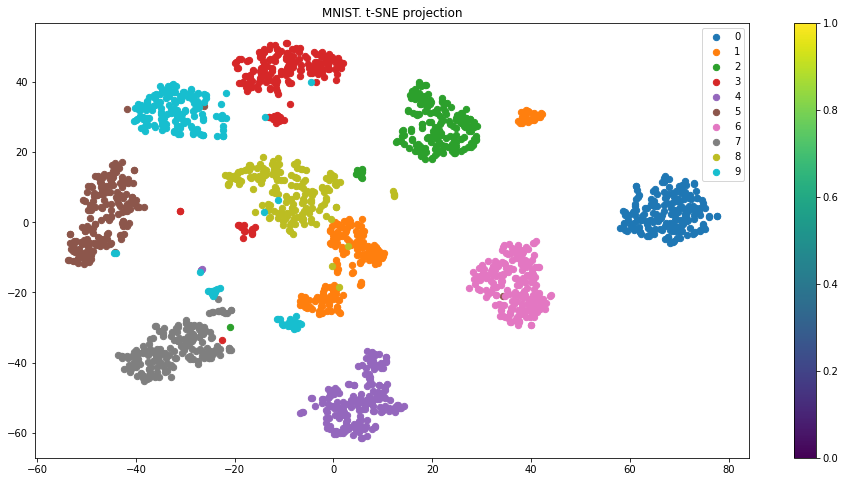

In [96]:
digits = datasets.load_digits()
tsne = TSNE(n_components=2, random_state=0)
X, y = digits.data, digits.target

#project data in 2D
X_2d = tsne.fit_transform(X)

target_ids = range(len(digits.target_names))
plt.figure(figsize=(16, 8))
for i, label in zip(target_ids, digits.target_names):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], label=label, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.title('MNIST. t-SNE projection');
plt.colorbar()
plt.legend()
plt.show()

**(1 балл)** For tSNE-transformed data with 2 features, perform hierarchical and $ K $ -means clustering (take the number of clusters equal to 10). Count the silhouette values and $ V $ -measures. Did you manage to get the silhouette and / or $ V $ -measure better than on the original data?

In [83]:
kmeans = KMeans(n_clusters=10, n_init=100)
kmeans.fit(X)
km_silhouette_score = metrics.silhouette_score(X, kmeans.labels_)
km_vm_score = metrics.v_measure_score(y, kmeans.labels_)
############
hc = AgglomerativeClustering(n_clusters=10)
hc.fit(X)
hc_silhouette_score = metrics.silhouette_score(X, hc.labels_)
hc_vm_score = metrics.v_measure_score(y, hc.labels_)

kmeans_2d = KMeans(n_clusters=10, n_init=100)
kmeans_2d.fit(X_2d)
km2d_silhouette_score = metrics.silhouette_score(X_2d, kmeans_2d.labels_)
km2d_vm_score = metrics.v_measure_score(y, kmeans_2d.labels_)
############
hc_2d = AgglomerativeClustering(n_clusters=10)
hc_2d.fit(X_2d)
hc2d_silhouette_score = metrics.silhouette_score(X_2d, hc_2d.labels_)
hc2d_vm_score = metrics.v_measure_score(y, hc_2d.labels_)


print('Scores before projecting data to 2D:')
print(f' kmeans silhouette_score {km_silhouette_score} \n hc silhouette_score: {hc_silhouette_score}')
print(f' kmeans v_measure score {km_vm_score} \n hc v_measure score: {hc_vm_score}')
print('------------------------------------------')
print('Scores after projecting data to 2D:')
print(f' kmeans silhouette_score {km2d_silhouette_score} \n hc silhouette_score: {hc2d_silhouette_score}')
print(f' kmeans v_measure score {km2d_vm_score} \n hc v_measure score: {hc2d_vm_score}')

Scores before projecting data to 2D:
 kmeans silhouette_score 0.18246601958265693 
 hc silhouette_score: 0.17849659940596496
 kmeans v_measure score 0.7444998053799311 
 hc v_measure score: 0.8681701126909083
------------------------------------------
Scores after projecting data to 2D:
 kmeans silhouette_score 0.6374303698539734 
 hc silhouette_score: 0.6387118697166443
 kmeans v_measure score 0.8983539438795606 
 hc v_measure score: 0.9093845793468884


**(0.5 балла)** For the best partitioning you can get (at your discretion, the best in terms of silhouette or $ V $ -measure), again visualize the centers of the clusters with pictures. Have you managed to ensure that each cluster corresponds to any one digit?

Silhouette values closer to 1 correspond to dense, well-defined clusters.
Perfect labelings are both homogeneous and complete, hence have score of v-measures close or equal to 1.0
With 2D data the silhouette_score and v-measures are closer 1, that's why will plot using X_2d

u_labels: [0 1 2 3 4 5 6 7 8 9]
X_2d: (1797, 2)


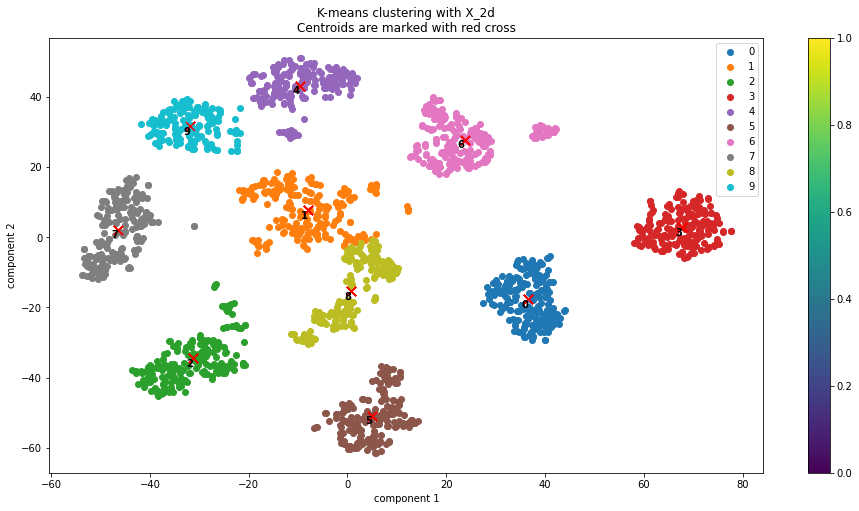

In [94]:
# #Kmeans
u_labels = np.unique(kmeans_2d.labels_)
km_centroids = kmeans_2d.cluster_centers_
centroid_labels = []
plt.figure(figsize=(16,8))
print(f'u_labels: {u_labels}')
print(f'X_2d: {X_2d.shape}')

for i in u_labels:
    plt.scatter(X_2d[kmeans_2d.labels_ == i , 0] , X_2d[kmeans_2d.labels_ == i , 1] , label = i)
    plt.scatter(km_centroids[:, 0], km_centroids[:, 1], s = 80, marker='x', color='r')

for i in range(10):
    centroid_labels.append('{0}'.format(i))
    xy=(km_centroids[i, 0],km_centroids[i, 1])
    plt.annotate(centroid_labels[i], xy, horizontalalignment='right', verticalalignment='top', weight='bold', clip_on=True)

plt.colorbar()
plt.title('K-means clustering with X_2d\n'
          'Centroids are marked with red cross')
plt.xlabel('component 1')
plt.ylabel('component 2')  
plt.legend()
plt.show()

How accurate our unsupervised clustering was in finding similar digits within the data: 
0.0
Silhouette:  0.63743037


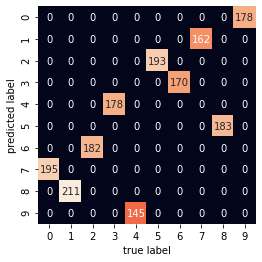

In [103]:
km_clusters = kmeans_2d.fit_predict(X_2d)

msk_labels = np.zeros_like(kmeans_2d.labels_)
for i in range(10):
    mask = (km_clusters == i)
    msk_labels[mask] = mode(y[mask])[0]

print(f'How accurate our unsupervised clustering was in finding similar digits within the data: \n{accuracy_score(kmeans_2d.labels_, msk_labels)}')
print('Silhouette: ', metrics.silhouette_score(X_2d,kmeans_2d.labels_))

mat = confusion_matrix(kmeans_2d.labels_, msk_labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

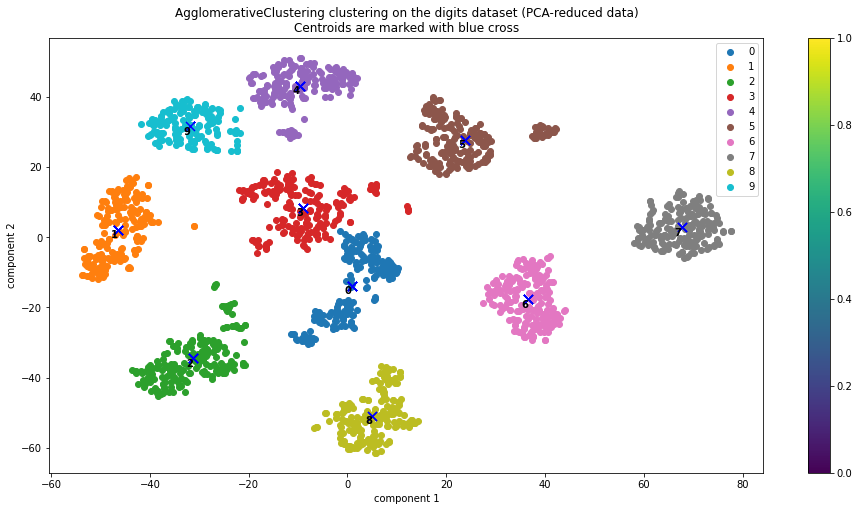

In [98]:
plt.figure(figsize=(16, 8))
clf = NearestCentroid()
clf.fit(X_2d, hc_2d.labels_)
hc_centroids = clf.centroids_
unique_labels = np.unique(hc_2d.labels_)
hc_centroid_labels = []

for i in range(10):
    hc_centroid_labels.append('{0}'.format(i))
    xy=(hc_centroids[i, 0],hc_centroids[i, 1])
    plt.annotate(hc_centroid_labels[i], xy, horizontalalignment='right', verticalalignment='top', weight='bold', clip_on=True)
for i in unique_labels:
    plt.scatter(X_2d[hc_2d.labels_ == i , 0], X_2d[hc_2d.labels_ == i , 1] , label = i)
    plt.scatter(hc_centroids[:, 0], hc_centroids[:, 1], s = 80, marker='x', color='b')

plt.title('AgglomerativeClustering clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with blue cross')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.legend()
plt.show()

How accurate our unsupervised clustering was in finding similar digits within the data: 
0.18196994991652754
Silhouette:  0.63871187


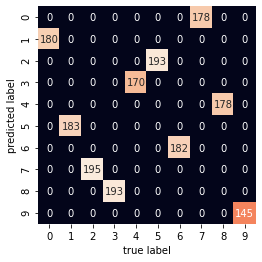

In [102]:
clf.fit(X_2d, hc_2d.labels_)
hc_centroids = clf.centroids_

msk_labels = np.zeros_like(hc_2d.labels_)
for i in range(10):
    mask = (hc_clusters == i)
    msk_labels[mask] = mode(y[mask])[0]

print(f'How accurate our unsupervised clustering was in finding similar digits within the data: \n{accuracy_score(hc_2d.labels_, msk_labels)}')
print('Silhouette: ', metrics.silhouette_score(X_2d,hc_2d.labels_))

#let's check with confusion_matrix as well
mat = confusion_matrix(hc_2d.labels_, msk_labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');


# 4. Итоги, бонус

**(1 балл)** Write in free form what conclusions you have drawn from the work performed. Answer at least the following two questions:
- Which of the two methods gives more meaningful clusters - hierarchical clustering or the $ K $ means algorithm? Does it depend on the settings of each algorithm? From the quality assessment criteria?
- Is it possible to improve the quality of clustering by reducing the dimension of the feature space?

KMeans clustering is found to work well when the structure of the clusters is hyper spherical (like circle in 2D,  sphere in 3D). However, Hierarchical (AgglomerativeClustering) clustering don’t work  as well as, k means when the  shape of the clusters is hyper  spherical.
We have seen the advantages of using both of them during the solution.

Hierarchical (AgglomerativeClustering) clustering:
1. Ease of handling of any forms of similarity or distance.
2. Consequently, applicability to any attributes types.

KMeans clustering:
1. Convergence is guranteed.
2. Specialized to clusters of different sizes and shapes.

As Silhouette and V-means scores implied, for the case of reading handwritten digits Hierarchical (AgglomerativeClustering) clustering provided better results. 

Considering the reasons I provided above and the observations derived from the analysis I've done, both clustering methods gave more meaningful clusters. Their difference in performance changes depending on the transformation of the data.

AgglomerativeClustering worked better than KMeans on untransformed data. But, KMeans gave more meaningful result for 2D (confusion matrix result). 
The most important factor to consider in both clustering methods to make them efficient is to be able to choose best cluster number (or threshold for Hierarchical clustering).

Another observation of me is, for 1<K<10 running Random Initialization more times doesn't necessarily impact the result. Because there's much higher chance that our first Random Initialization will give a pretty descent solution already. Multiple Random Initialization can probably give a bit better solution but not that much.

To make concise visual conclusions,let's take a look at how these metrics perform with the MNIST handwritten numbers dataset:

In [105]:
data = datasets.load_digits()
X, y = data.data, data.target

algorithms = []
algorithms.append(KMeans(n_clusters=10, random_state=1))
algorithms.append(AgglomerativeClustering(n_clusters=10))

data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_,
                                                 average_method='arithmetic'),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_),
        'Silhouette': metrics.silhouette_score(X, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure', 
                                           'Silhouette'],
                       index=['K-means','Agglomerative'])

results

,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,0.662295,0.736567,0.735448,0.742972,0.739191,0.182097
Agglomerative,0.794003,0.866832,0.857513,0.879096,0.868170,0.178497


The results prove that Agglomerative clustering performs better for 10 clusters, and on untransformed data (not shrinked to 2D)

**(Бонусные 2 балла)** Download the dataset [MNIST Handwritten Digits](http://yann.lecun.com/exdb/mnist). How to do this with scikit-learn is written [here](https://stackoverflow.com/a/60450028). MNIST Handwritten Digits are 70 thousand recognized handwritten digits, each 28 $ \ times $ 28 pixels in size. Try to cluster this dataset and achieve the best silhouette and $ V $ -measure values possible.

In [1]:
from sklearn.datasets import fetch_openml
X_openml, y_openml = fetch_openml('mnist_784', version=1, return_X_y=True)

In [2]:
print(f'data with shape: {X_openml.shape}')
print(f'target with shape: {y_openml.shape}')

data with shape: (70000, 784)
target with shape: (70000,)


Kmeans clusterization result shape: (70000,)
u_labels: [0 1 2 3 4 5 6 7 8 9]
reduced_data: (70000, 2)


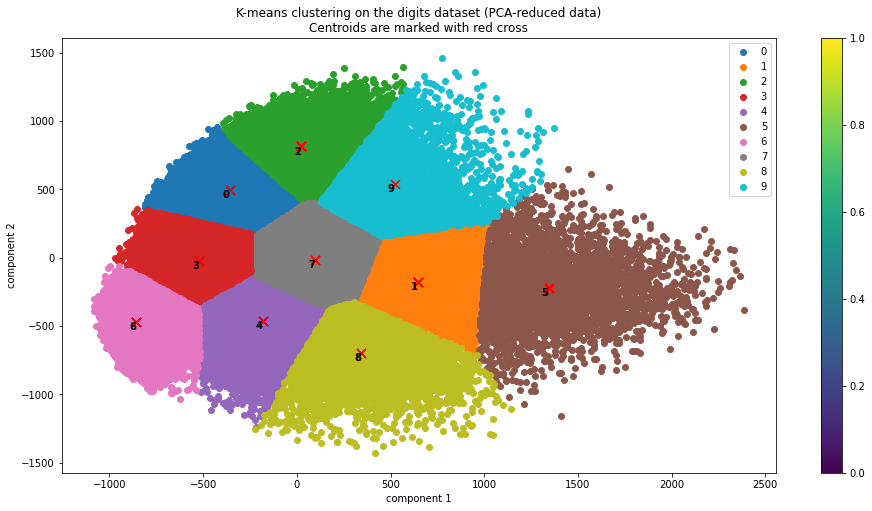

In [5]:
#Kmeans

#Transform the data
reduced_data = PCA(n_components=2).fit_transform(X_openml)

#Initialize the class object
kmeans = KMeans(n_clusters= 10, n_init=100)
kmeans_labels = kmeans.fit_predict(reduced_data)

print(f'Kmeans clusterization result shape: {kmeans_labels.shape}')

#Kmeans

u_labels = np.unique(kmeans_labels)
km_centroids = kmeans.cluster_centers_
centroid_labels = []
plt.figure(figsize=(16,8))
print(f'u_labels: {u_labels}')
print(f'reduced_data: {reduced_data.shape}')

for i in u_labels:
    plt.scatter(reduced_data[kmeans_labels == i , 0] , reduced_data[kmeans_labels == i , 1] , label = i)
    plt.scatter(km_centroids[:, 0], km_centroids[:, 1], s = 80, marker='x', color='r')

for i in range(10):
    centroid_labels.append('{0}'.format(i))
    xy=(km_centroids[i, 0],km_centroids[i, 1])
    plt.annotate(centroid_labels[i], xy, horizontalalignment='right', verticalalignment='top', weight='bold', clip_on=True)

plt.colorbar()
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with red cross')
plt.xlabel('component 1')
plt.ylabel('component 2')  
plt.legend()
plt.show()

In [ ]:
# AgglomerativeClustering

#Initialize the class object
hierarchical = AgglomerativeClustering(n_clusters=10)
hc_labels = hierarchical.fit_predict(reduced_data)

print(f'Hierarchical clusterization result shape: {hc_labels.shape}')

plt.figure(figsize=(16, 8))
clf = NearestCentroid()
clf.fit(reduced_data, hc_labels)
hc_centroids = clf.centroids_
unique_labels = np.unique(hc_labels)
hc_centroid_labels = []

for i in range(10):
    hc_centroid_labels.append('{0}'.format(i))
    xy=(hc_centroids[i, 0],hc_centroids[i, 1])
    plt.annotate(hc_centroid_labels[i], xy, horizontalalignment='right', verticalalignment='top', weight='bold', clip_on=True)
for i in unique_labels:
    plt.scatter(reduced_data[hc_labels == i , 0], reduced_data[hc_labels == i , 1] , label = i)
    plt.scatter(hc_centroids[:, 0], hc_centroids[:, 1], s = 80, marker='x', color='b')

plt.title('AgglomerativeClustering clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with blue cross')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.legend()
plt.show()

In [125]:
km_silhouette_coefficients = []
hc_silhouette_coefficients = []
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, n_init=100)
    kmeans.fit(reduced_data)
    score = metrics.silhouette_score(reduced_data, kmeans.labels_)
    km_silhouette_coefficients.append(score)
    
    hc = AgglomerativeClustering(n_clusters=k)
    hc.fit(reduced_data)
    score = metrics.silhouette_score(reduced_data, hc.labels_)
    hc_silhouette_coefficients.append(score)
    
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
ax1.plot(range(2, 21), km_silhouette_coefficients, c='b')
ax1.set_xticks(range(2, 21))
ax1.set_xlabel("Number of clusters in Kmeans")
ax1.set_ylabel("Kmeans silhouette coefficient")
ax1.grid(linestyle='--', alpha=0.8)

ax2.plot(range(2, 21), hc_silhouette_coefficients, c='g')
ax2.set_xticks(range(2, 21))
ax2.set_xlabel("Number of clusters in AgglomerativeClustering")
ax2.set_ylabel("AgglomerativeClustering silhouette coefficient")
ax2.grid(linestyle='--', alpha=0.8)

plt.show()

Clustered the data using two methods: Kmeans and Agglomerative Clustering. Showed the performance of silhouette_score and silhouette_score